In [1]:
#Nathan Li - Massachusetts Inequality - 4/27/2021
#Datasets: https://datausa.io/profile/geo/massachusetts

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ma-education/Poverty by Age and Gender/Poverty by Age and Gender.csv
/kaggle/input/ma-education/Concentrations/Concentrations.csv
/kaggle/input/ma-education/Student Race and Ethnicity/Student Race and Ethnicity.csv
/kaggle/input/ma-education/Wage by Race and Ethnicity in Common Jobs/Wage by Race and Ethnicity in Common Jobs.csv
/kaggle/input/ma-education/Student Gender for Common Institutions/Student Gender for Common Institutions.csv
/kaggle/input/ma-education/Wage by Gender in Common Jobs/Wage by Gender in Common Jobs.csv


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [3]:
concentrations_data = pd.read_csv("/kaggle/input/ma-education/Concentrations/Concentrations.csv")
poverty_data = pd.read_csv("/kaggle/input/ma-education/Poverty by Age and Gender/Poverty by Age and Gender.csv")
student_race_data = pd.read_csv("/kaggle/input/ma-education/Student Race and Ethnicity/Student Race and Ethnicity.csv")
wage_race_data = pd.read_csv("/kaggle/input/ma-education/Wage by Race and Ethnicity in Common Jobs/Wage by Race and Ethnicity in Common Jobs.csv")
student_gender_data = pd.read_csv("/kaggle/input/ma-education/Student Gender for Common Institutions/Student Gender for Common Institutions.csv")
wage_gender_data = pd.read_csv("/kaggle/input/ma-education/Wage by Gender in Common Jobs/Wage by Gender in Common Jobs.csv")

In [4]:
concentrations_data.head()

,ID CIP2,CIP2,ID CIP4,CIP4,ID CIP6,CIP6,ID Year,Year,ID Nation,Nation,ID Degree,Degree,Completions,Slug CIP6,Geography,ID Geography,Slug Geography
0,1,Agriculture,100,General Agriculture,10000,General Agriculture,2019,2019,01000US,United States,5,Bachelors Degree,5,general-agriculture-010000,Massachusetts,04000US25,massachusetts
1,1,Agriculture,103,Agricultural Production Operations,10303,Aquaculture,2019,2019,01000US,United States,5,Bachelors Degree,1,aquaculture,Massachusetts,04000US25,massachusetts
2,1,Agriculture,103,Agricultural Production Operations,10307,Horse Husbandry & Equine Management,2019,2019,01000US,United States,5,Bachelors Degree,2,horse-husbandry-equine-management,Massachusetts,04000US25,massachusetts
3,1,Agriculture,103,Agricultural Production Operations,10308,Agroecology & Sustainable Agriculture,2019,2019,01000US,United States,5,Bachelors Degree,27,agroecology-sustainable-agriculture,Massachusetts,04000US25,massachusetts
4,1,Agriculture,105,Agricultural & Domestic Animal Services,10507,Equestrian Studies,2019,2019,01000US,United States,5,Bachelors Degree,2,equestrian-studies,Massachusetts,04000US25,massachusetts


# Concentrations
We will be looking at differences in education and subsequent careers based on gender and race. First, lets take a look at the most common degree paths in MA.

Text(0.5, 1.0, 'Treemap of MA Concentrations')

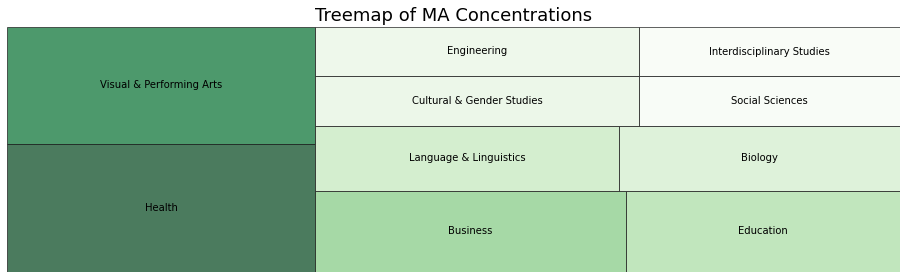

In [5]:
my_values = concentrations_data.CIP2.value_counts()[:10]
cmap = matplotlib.cm.Greens
mini = min(my_values)
maxi = max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=my_values, label=my_values.index, alpha=.7, color=colors, bar_kwargs=dict(linewidth=1, edgecolor="#222222")).axis("off")
plt.title("Treemap of MA Concentrations", size=18)

# The Students
Now that we know what students are studying, lets actually see who those students are.

In [6]:
student_gender_data.head()

,ID Gender,Gender,ID Year,Year,ID University,University,Completions,Slug University,Geography,ID Geography,Slug Geography
0,1,Men,2019,2019,164924,Boston College,2181,boston-college,Massachusetts,04000US25,massachusetts
1,1,Men,2019,2019,164988,Boston University,4760,boston-university,Massachusetts,04000US25,massachusetts
2,1,Men,2019,2019,166027,Harvard University,4669,harvard-university,Massachusetts,04000US25,massachusetts
3,1,Men,2019,2019,166629,University of Massachusetts-Amherst,4519,university-of-massachusetts-amherst,Massachusetts,04000US25,massachusetts
4,1,Men,2019,2019,167358,Northeastern University,3918,northeastern-university,Massachusetts,04000US25,massachusetts


Text(0.5, 1.0, 'Student Gender in MA')

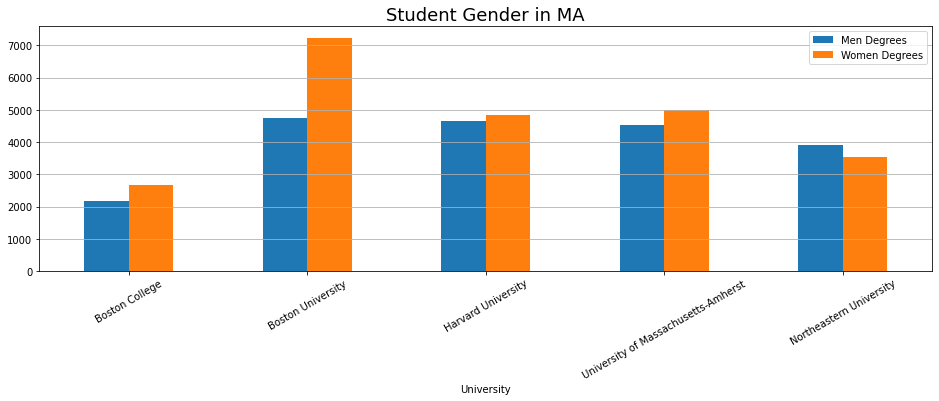

In [7]:
data = student_gender_data.loc[student_gender_data['Year'] == 2019][['Gender', 'University', 'Completions']]
fixed_data = pd.DataFrame(columns=['University', 'Men Degrees', 'Women Degrees'])
fixed_data.University = data.University.unique()
fixed_data['Men Degrees'] = data[data['Gender'].isin(['Men'])].Completions
fixed_data['Women Degrees'] = data[data['Gender'].isin(['Women'])].Completions.reset_index().drop(['index'], axis=1)
fixed_data
fixed_data.plot(x='University', y=['Men Degrees', 'Women Degrees'], kind='bar', figsize=(16, 4.5), rot=30)
plt.grid(axis='y')
plt.title("Student Gender in MA", size=18)

Based on the graph above, we see that women with degrees typically outnumbered men with degrees in the MA colleges with top 5 number of degrees given during the year of 2019.


Now, lets take a look at student degrees based on race.

In [8]:
student_race_data.head()

,ID IPEDS Race,IPEDS Race,ID Year,Year,Completions,Geography,ID Geography,Slug Geography,share
0,asian,Asian,2019,2019,11321,Massachusetts,04000US25,massachusetts,0.093158
1,black,Black or African American,2019,2019,9421,Massachusetts,04000US25,massachusetts,0.077523
2,hawaiian,Native Hawaiian or Other Pacific Islanders,2019,2019,101,Massachusetts,04000US25,massachusetts,0.000831
3,hispanic,Hispanic or Latino,2019,2019,12781,Massachusetts,04000US25,massachusetts,0.105172
4,multiracial,Two or More Races,2019,2019,3818,Massachusetts,04000US25,massachusetts,0.031417


Text(0.5, 1.0, 'Student Race in MA')

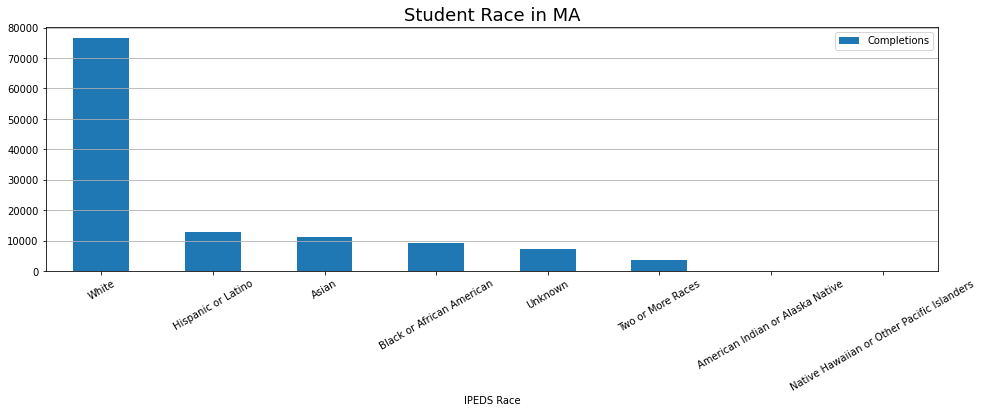

In [9]:
data = student_race_data.loc[student_race_data['Year'] == 2019][['IPEDS Race', 'Completions', 'share']]
data.sort_values(by=['Completions'], ascending=False, inplace=True)
data.plot(x='IPEDS Race', y=['Completions'], kind='bar', figsize=(16, 4.5), rot=30)
plt.grid(axis='y')
plt.title("Student Race in MA", size=18)

Based on the graph above, we see that white students with degrees vastly outnumbered any other minorities in the year 2019.

Now that we have some idea of gender and race distribution among MA college students, how do they stack up after college?

# After College

First, let's refer back to the gender difference son campuses and see how they compare once in the workplace.

In [10]:
wage_gender_data.head()

,ID Gender,Gender,ID Year,Year,ID Employment Time Status,Employment Time Status,ID Detailed Occupation,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Record Count,Geography,ID Geography,Slug Geography
0,1,Male,2019,2019,1,Full-time,1191XX,Other managers,143828.007366,11933.716777,60953,5992.879466,642,Massachusetts,04000US25,massachusetts
1,1,Male,2019,2019,1,Full-time,291141,Registered nurses,92981.367919,14620.180935,5561,1828.965144,51,Massachusetts,04000US25,massachusetts
2,1,Male,2019,2019,1,Full-time,151252,Software developers,132054.705962,7672.418087,55418,5720.268071,596,Massachusetts,04000US25,massachusetts
3,1,Male,2019,2019,1,Full-time,252020,Elementary & middle school teachers,64481.288199,8158.291742,10465,2506.713648,108,Massachusetts,04000US25,massachusetts
4,1,Male,2019,2019,1,Full-time,412010,Cashiers,31588.740857,7968.413903,5086,1749.263650,46,Massachusetts,04000US25,massachusetts


Text(0.5, 1.0, 'Worker Gender in MA')

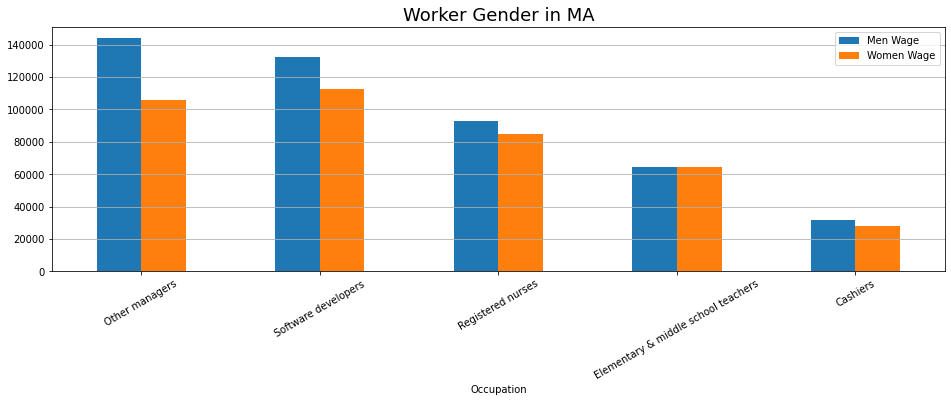

In [11]:
data = wage_gender_data.loc[wage_gender_data['Year'] == 2019][['Gender', 'Detailed Occupation', 'Average Wage']]
data
fixed_data = pd.DataFrame(columns=['Occupation', 'Men Wage', 'Women Wage'])
fixed_data.Occupation = data['Detailed Occupation'].unique()
fixed_data['Men Wage'] = data[data['Gender'].isin(['Male'])]['Average Wage']
fixed_data['Women Wage'] = data[data['Gender'].isin(['Female'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data.sort_values(by=['Men Wage'], ascending=False, inplace=True)
fixed_data.plot(x='Occupation', y=['Men Wage', 'Women Wage'], kind='bar', figsize=(16, 4.5), rot=30)
plt.grid(axis='y')
plt.title("Worker Gender in MA", size=18)

Despite women in Massachusetts earning more degrees than men, women seem to earn a concerningly smaller wage than men for the same kinds of work.

In [12]:
poverty_data.head()

,ID Age,Age,ID Gender,Gender,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Moe,Geography,ID Geography,Slug Geography,share
0,0,Under 5 Years,0,Male,2018,2018,0,Income In The Past 12 Months Below Poverty Level,27512,1418.0,Massachusetts,04000US25,massachusetts,0.038733
1,0,Under 5 Years,1,Female,2018,2018,0,Income In The Past 12 Months Below Poverty Level,27063,1188.0,Massachusetts,04000US25,massachusetts,0.038101
2,1,5 Years,0,Male,2018,2018,0,Income In The Past 12 Months Below Poverty Level,4855,551.0,Massachusetts,04000US25,massachusetts,0.006835
3,1,5 Years,1,Female,2018,2018,0,Income In The Past 12 Months Below Poverty Level,5543,554.0,Massachusetts,04000US25,massachusetts,0.007804
4,2,6 to 11 Years,0,Male,2018,2018,0,Income In The Past 12 Months Below Poverty Level,32373,1635.0,Massachusetts,04000US25,massachusetts,0.045576


Text(0.5, 1.0, 'Poverty Gender in MA')

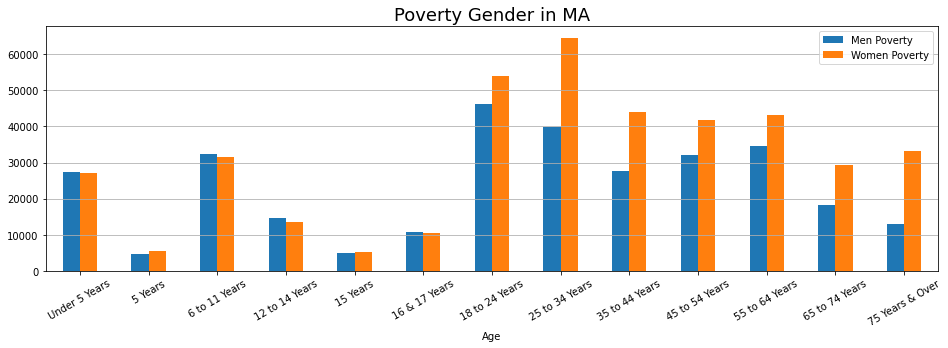

In [13]:
data = poverty_data.loc[poverty_data['Year'] == 2018][['Gender', 'Age', 'Poverty Population']]
data
fixed_data = pd.DataFrame(columns=['Age', 'Men Poverty', 'Women Poverty'])
fixed_data.Age = data['Age'].unique()
fixed_data['Men Poverty'] = data[data['Gender'].isin(['Male'])]['Poverty Population'].reset_index().drop(['index'], axis=1)
fixed_data['Women Poverty'] = data[data['Gender'].isin(['Female'])]['Poverty Population'].reset_index().drop(['index'], axis=1)
fixed_data.plot(x='Age', y=['Men Poverty', 'Women Poverty'], kind='bar', figsize=(16, 4.5), rot=30)
plt.grid(axis='y')
plt.title("Poverty Gender in MA", size=18)

Unfortuantely, we see a similar trend when analyzing poverty by gender and age. Women aged 18 and older in MA are consistently more impoverished than men, despite women earning more degrees than men in MA.

Before we wrap up, let's take a look at race and wages in the workplace.

In [14]:
wage_race_data.head()

,ID Race,Race,ID Year,Year,ID Workforce Status,Workforce Status,ID Detailed Occupation,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Record Count,Geography,ID Geography,Slug Geography
0,1,White,2019,2019,True,True,1191XX,Other managers,124080.844674,8658.079607,98612,7600.910409,1061,Massachusetts,04000US25,massachusetts
1,1,White,2019,2019,True,True,291141,Registered nurses,77937.920387,3748.308496,67552,6319.511156,722,Massachusetts,04000US25,massachusetts
2,1,White,2019,2019,True,True,151252,Software developers,129179.499581,8761.762703,45318,5192.716106,515,Massachusetts,04000US25,massachusetts
3,1,White,2019,2019,True,True,252020,Elementary & middle school teachers,60912.748164,3040.486035,56791,5803.371052,635,Massachusetts,04000US25,massachusetts
4,1,White,2019,2019,True,True,412010,Cashiers,14376.064544,1692.251667,47518,5315.580164,449,Massachusetts,04000US25,massachusetts


Text(0.5, 1.0, 'Worker Race in MA')

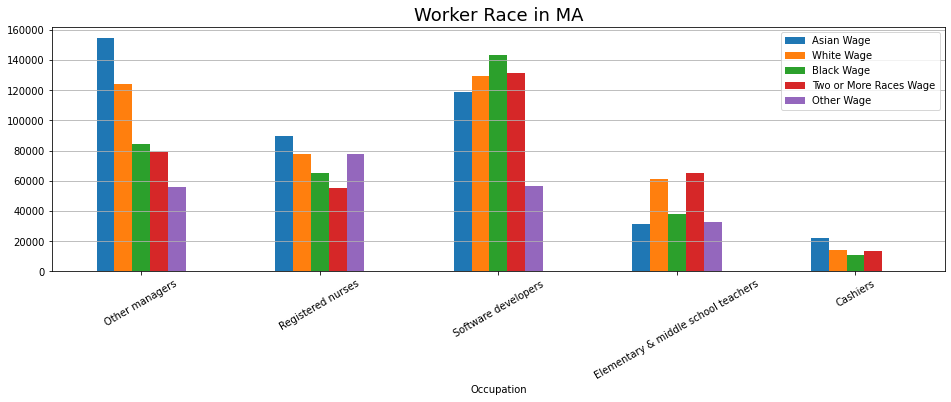

In [15]:
data = wage_race_data.loc[wage_race_data['Year'] == 2019][['Detailed Occupation', 'Race', 'Average Wage']]
data
fixed_data = pd.DataFrame(columns=['Occupation', 'Asian Wage', 'White Wage', 'Black Wage', 'Two or More Races Wage', 'Other Wage'])
fixed_data.Occupation = data['Detailed Occupation'].unique()
fixed_data['Asian Wage'] = data[data['Race'].isin(['Asian'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data['White Wage'] = data[data['Race'].isin(['White'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data['Black Wage'] = data[data['Race'].isin(['Black'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data['Two or More Races Wage'] = data[data['Race'].isin(['Two or More Races'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data['Other Wage'] = data[data['Race'].isin(['Other'])]['Average Wage'].reset_index().drop(['index'], axis=1)
fixed_data.plot(x='Occupation', y=['Asian Wage', 'White Wage', 'Black Wage', 'Two or More Races Wage', 'Other Wage'], kind='bar', figsize=(16, 4.5), rot=30)
plt.grid(axis='y')
plt.title("Worker Race in MA", size=18)

Here, we see that some industries have larger ranges of wages than others. In the general management category, Asians and Whites seem to dominate wages, but wages are much more balanced in the similar-paying software developer workforce.

# Conclusion

Before we draw final conclusions, it is important to remember that the data we have seen today is only a snapshot of larger trends in terms of both time and location. We mostly saw just data from 2019, and Massachusetts certainly does not represent accurate trends across the entire nation. With that said, the six data sets we have seen today still provide important highlights for the gaps in education and wage during the transition from school to the workforce. Somewhere along the line to work, women are getting the short end of the stick in terms of wages, and minorities are also seeing lower wages in certain industries. The hope is for this relatively short analysis to stimulate further conversation and progress towards a more just future.